# Image Compression with the Singular Value Decomposition

#### A singular value decomposition of a real matrix A ∈ R^(m x n) is
#### A = UDV^T
#### where D ∈ R^(m x n) has nonzero entries (the singular values σi) only along its diagonal, and where U ∈ R^(m x m) and V ∈ R^(m x n) are orthogonal matrices. The singular values σi collectively give some measure of how “large” the matrix A is.

### Using Numpy to create a sample Matrix

In [2]:
from matplotlib import pyplot as plt
import numpy as np
np.random.seed(12345)

In [3]:
a_1 = np.random.randint(1, 3, (5, 3))
a_2 = np.random.randint(1, 3, (3, 7))

A = a_1 @ a_2 + 0.1*np.random.randn(5, 7)
A

array([[ 9.13529168, 10.08864293,  9.79983627,  7.96281575,  9.16690253,
         4.95614303,  6.94602586],
       [ 8.0476985 , 10.32489439,  9.89787725,  8.94229127,  8.01241213,
         5.03026136,  7.05237721],
       [ 7.00009403,  8.13438098,  7.9286456 ,  6.91688465,  6.76297683,
         3.81392392,  5.91392426],
       [ 9.05601453,  9.87340655, 10.01198271,  7.89364876,  9.03328827,
         4.76405812,  6.9800457 ],
       [ 8.84580045,  9.90292641,  9.86929697,  8.02863497,  9.03779841,
         4.92461135,  7.03312857]])

### Visualizing the matrix as an image

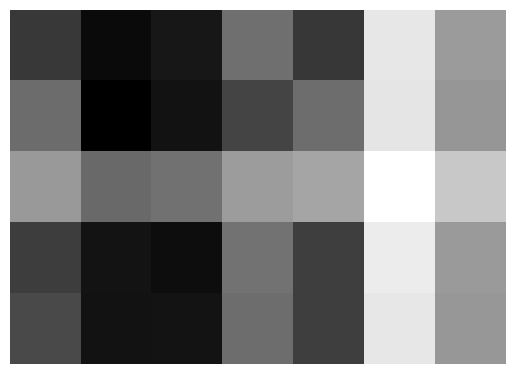

In [4]:
plt.imshow(A, cmap = "Greys")
a = plt.gca().axis("off")

### Now using the matrix, we can compute a singular value decomposition:

In [5]:
U, sigma, V = np.linalg.svd(A)

In [6]:
# create the D matrix in the SVD
D = np.zeros_like(A,dtype=float) # matrix of zeros of same shape as A
D[:min(A.shape),:min(A.shape)] = np.diag(sigma)        # singular values on the main diagonal
D

array([[47.92787806,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  1.59525638,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.35772778,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.23426796,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.15684841,
         0.        ,  0.        ]])

In [7]:
U @ D @ V # == A up to numerical precision

array([[ 9.13529168, 10.08864293,  9.79983627,  7.96281575,  9.16690253,
         4.95614303,  6.94602586],
       [ 8.0476985 , 10.32489439,  9.89787725,  8.94229127,  8.01241213,
         5.03026136,  7.05237721],
       [ 7.00009403,  8.13438098,  7.9286456 ,  6.91688465,  6.76297683,
         3.81392392,  5.91392426],
       [ 9.05601453,  9.87340655, 10.01198271,  7.89364876,  9.03328827,
         4.76405812,  6.9800457 ],
       [ 8.84580045,  9.90292641,  9.86929697,  8.02863497,  9.03779841,
         4.92461135,  7.03312857]])

In [8]:
k = 2
U_ = U[:,:k]
D_ = D[:k, :k]
V_ = V[:k, :]

In [9]:
A_ = U_ @ D_ @ V_

### We can take a look at the comparisons of the new reconstructed image and the original

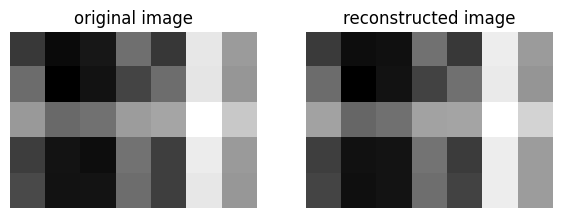

In [10]:
def compare_images(A, A_):

    fig, axarr = plt.subplots(1, 2, figsize = (7, 3))

    axarr[0].imshow(A, cmap = "Greys")
    axarr[0].axis("off")
    axarr[0].set(title = "original image")

    axarr[1].imshow(A_, cmap = "Greys")
    axarr[1].axis("off")
    axarr[1].set(title = "reconstructed image")

compare_images(A, A_)

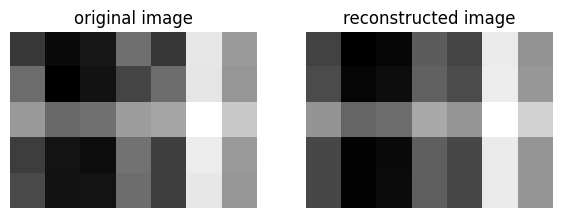

In [11]:
k = 1
U_ = U[:,:k]
D_ = D[:k, :k]
V_ = V[:k, :]
A_ = U_ @ D_ @ V_
compare_images(A, A_)

The images almost look visually close and similar

## Performing the same method to an actual image

### Reading the image

In [12]:
import PIL
import urllib

def read_image(url):
    return np.array(PIL.Image.open(urllib.request.urlopen(url)))

In [13]:
url = "https://wallpapers.com/images/hd/cute-spongebob-playing-soccer-cd7tg9yci4brk87w.jpg"

img = read_image(url)

### Converting to Greyscale

[Text(0.5, 1.0, 'greyscale')]

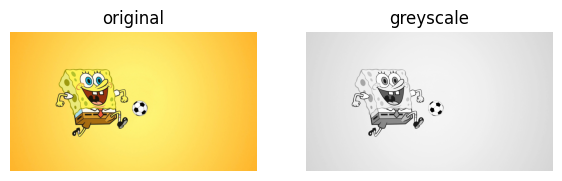

In [14]:
fig, axarr = plt.subplots(1, 2, figsize = (7, 3))

def to_greyscale(im):
    return 1 - np.dot(im[...,:3], [0.2989, 0.5870, 0.1140])

grey_img = to_greyscale(img)

axarr[0].imshow(img)
axarr[0].axis("off")
axarr[0].set(title = "original")

axarr[1].imshow(grey_img, cmap = "Greys")
axarr[1].axis("off")
axarr[1].set(title = "greyscale")

In [15]:
grey_img.shape

(1080, 1920)

### Creating svd_reconstruct to reconstruct the image

In [22]:
def svd_reconstruct(image, k):
    # Perform singular value decomposition
    U, sigma, V = np.linalg.svd(image)
    
    # Truncate singular values
    D = np.zeros_like(image, dtype=float)
    D[:min(image.shape),:min(image.shape)] = np.diag(sigma)
    
    A = U[:, :k] @ D[:k, :k] @ V[:k, :]
    
    return A

#### The function svd_reconstruct performs singular value decomposition (SVD) on an input image and then reconstructs it using a specified number of singular values. One key feature is the np.linalg.svd which is the main code that calculates our SVD using Linear Algebra. 

### Now we can perform an experiment in which the image is reconstructed with several different values of k.

#### The function svd_experiment performs an experiment using the svd_reconstruct function to reconstruct an image with different numbers of singular values. It then displays the reconstructed images for visual comparison.

In [33]:
def svd_experiment(image):
    # Original image dimensions
    m, n = image.shape
    
    # Total number of pixels in the original image
    total_pixels = m * n
    
    rows = 4
    cols = 4
    fig, axarr = plt.subplots(rows, cols, figsize=(20, 10))
    
    k_values = [5 * i for i in range(1, 17)]
    
    for i, k in enumerate(k_values):
        reconstructed_image = svd_reconstruct(image, k)
        
        # Calculate the storage required for the reconstructed image
        reconstructed_pixels = k * (m + n + k) 
            
        # Display the reconstructed image for visual comparison
        subplot_row = i // cols
        subplot_col = i % cols
        subplot_ax = axarr[subplot_row, subplot_col]
        
        subplot_ax.imshow(reconstructed_image, cmap='Greys')
        title = f'{k} components %storage = {round((reconstructed_pixels / total_pixels)*100, 1)}'
        subplot_ax.set_title(title)
    
    plt.tight_layout()
    plt.show()

#### Given, an m X n greyscale image needs mn pixels, the SVD will need k*(m + n + k) or km + kn + kk pixels.

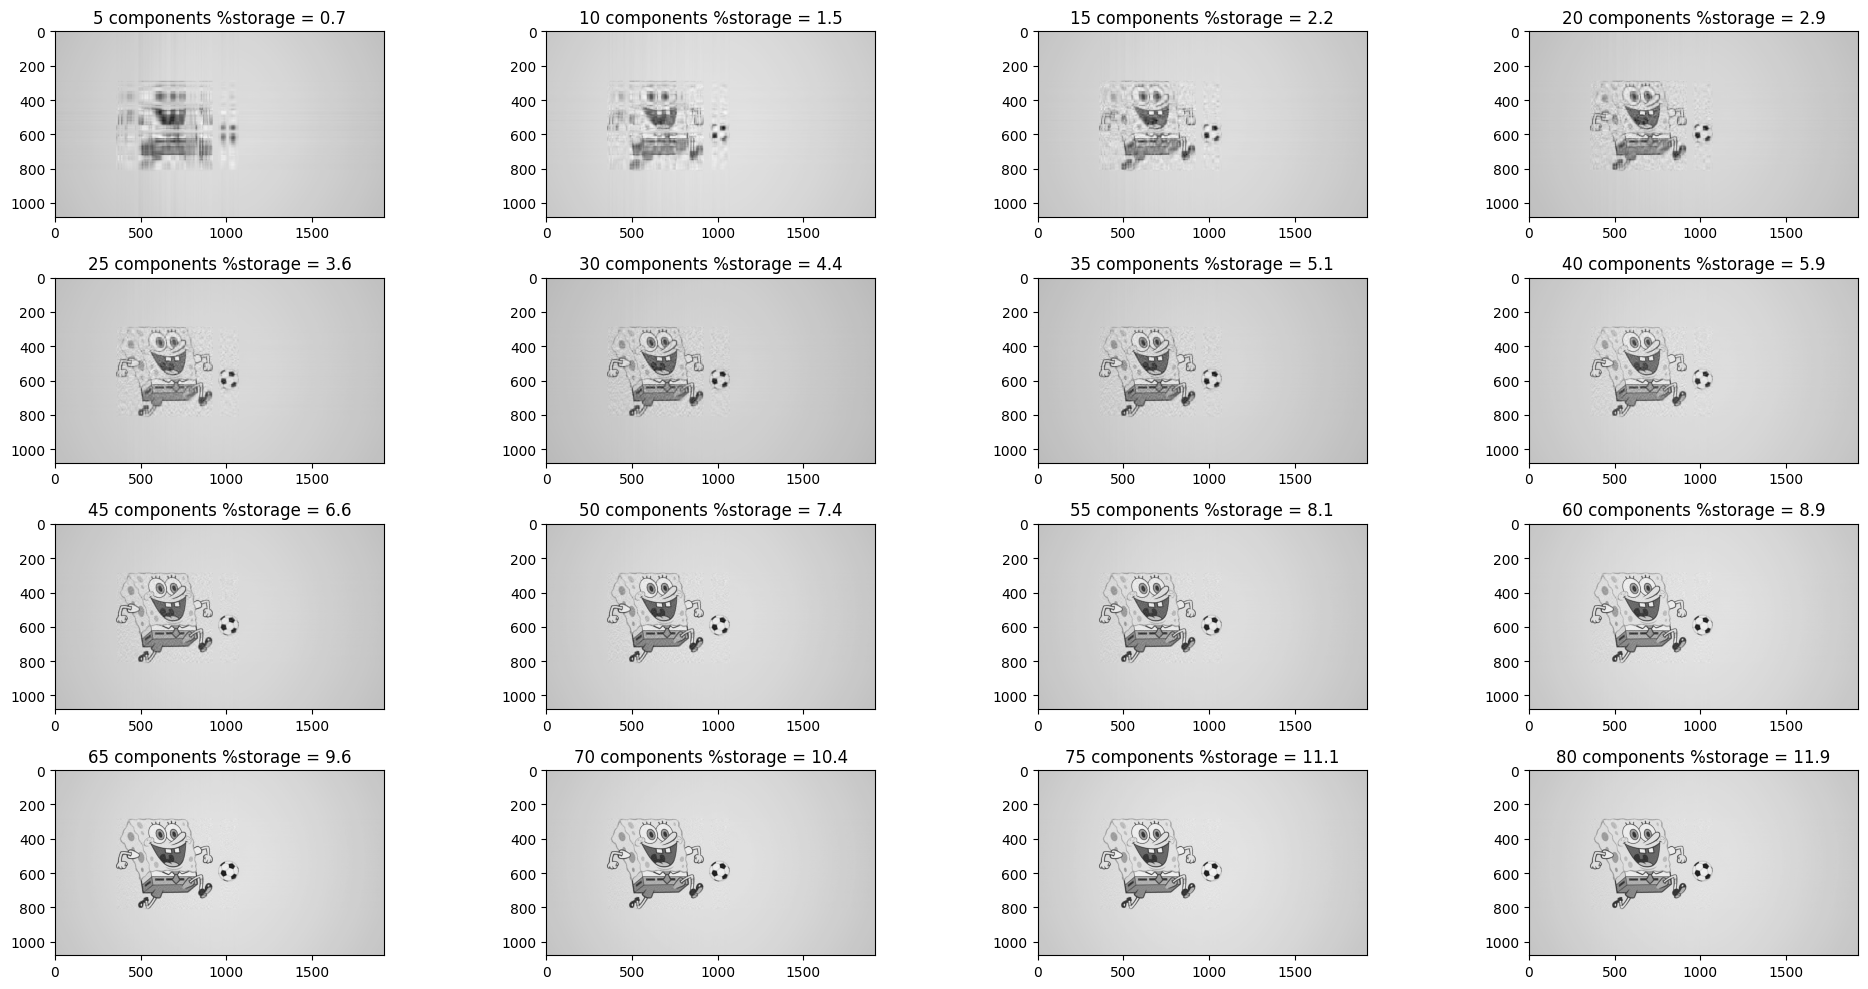

In [34]:
svd_experiment(grey_img)

#### It can be seen as the value of k or the number of components increases our image compresses better and get's to its orginal image. By the team it is 65 components it already almost looks like the original image, and it only required 9.6% of the storage.

### We can also allow the user to specify a desired compression factor 

##### The following function is edited version of the previous svd_reconstruct, as now we focus on using a user specified compression factor to obtain the value of k. The compression factor is obtained through the formula:

#### Compression Factor = Reconstructed Pixels / Total Pixels = k( m + n + k)/(mn)

##### Now, we can just switch the equation to solve for k, as we already have the compression factor which will help us to solve for k, and the final equation we get is a quadratic equation:

#### k = -m + n + √ (m^2 + 2mn + n^2 + 4cfmn)/2

##### Simply, converting the equation to code below, and later converting it into an integer, since the SVD later takes into consideration the notion of slicing to return the reconstructed image.

In [40]:
def svd_reconstruct(image, cf):
    # Perform singular value decomposition
    U, sigma, V = np.linalg.svd(image)
    
    # Truncate singular values
    D = np.zeros_like(image, dtype=float)
    D[:min(image.shape),:min(image.shape)] = np.diag(sigma)
    
    m, n = image.shape
    #Solving compression factor equation in terms of k
    k = (-m + n + np.sqrt(m**2 + 2*m*n + n**2 + 4*cf*m*n)/2)
    k = np.floor(k)
    k = k.astype(int)
    A_ = U[:, :k] @ D[:k, :k] @ V[:k, :]
    
    return A_

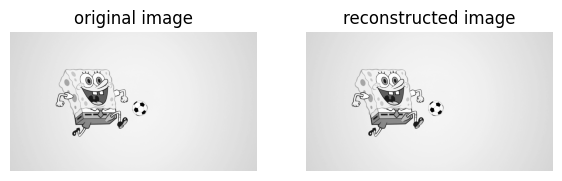

In [39]:
newimage = svd_reconstruct(grey_img, 20)
compare_images(grey_img, newimage)

#### The reconstructed image can be seen to be compressed by a factor of 20%, and it can be seen through the shades of both images as the reconstructed image is a bit more lighter than the original.